<a href="https://colab.research.google.com/github/nyp-sit/it3103-2024s2/blob/main/session-3/grounding-dino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 5.8 MB/s eta 0:00:00


In [ ]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

model_id = "IDEA-Research/grounding-dino-tiny"
device = "cuda"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
# Check for cats and remote controls
text = "a cat. a remote control."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)
print(results)

[{'scores': tensor([0.4785, 0.4379, 0.4761], device='cuda:0'), 'labels': ['a cat', 'a cat', 'a remote control'], 'boxes': tensor([[344.6979,  23.1083, 637.1820, 374.2745],
        [ 12.2694,  51.9102, 316.8564, 472.4338],
        [ 38.5847,  70.0091, 176.7772, 118.1754]], device='cuda:0')}]


In [ ]:
x = results[0]['labels']
print(x)

['a cat', 'a cat', 'a remote control']


In [ ]:
!wget http://images.cocodataset.org/val2017/000000039769.jpg


--2024-09-15 16:00:01--  http://images.cocodataset.org/val2017/000000039769.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.204.185, 16.182.40.201, 52.217.89.92, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.204.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 173131 (169K) [image/jpeg]
Saving to: ‘000000039769.jpg’

000000039769.jpg    100%[===================>] 169.07K   880KB/s    in 0.2s    

2024-09-15 16:00:02 (880 KB/s) - ‘000000039769.jpg’ saved [173131/173131]



In [ ]:
import supervision as sv
import cv2
import numpy as np

image = cv2.imread("image.jpeg")

detections = sv.Detections(
  xyxy=np.array([x0, y0, x1, y1]),
  class_id=np.array([0]),
  confidence=np.array([0.94])
)

bounding_box_annotator = sv.BoundingBoxAnnotator()
annotated_frame = bounding_box_annotator.annotate(
    scene=image.copy(),
    detections=detections
)

sv.plot_image(annotated_frame)

NameError: name 'x0' is not defined

In [ ]:
labels = [0, 0, 1]

In [ ]:
results[0]['labels']

['a cat', 'a cat', 'a remote control']

In [ ]:
import supervision as sv
import cv2
import numpy as np

In [ ]:

detections = sv.Detections(
  xyxy=np.array(results[0]['boxes'].cpu()),
  class_id=np.array(labels),
  confidence=np.array(results[0]['scores'].cpu())
)

In [ ]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
annotated_frame = bounding_box_annotator.annotate(
    scene=image.copy(),
    detections=detections,
)

label_annotator = sv.LabelAnnotator()
annotated_image = label_annotator.annotate(
    scene=annotated_frame, detections=detections, labels=results[0]['labels'])

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


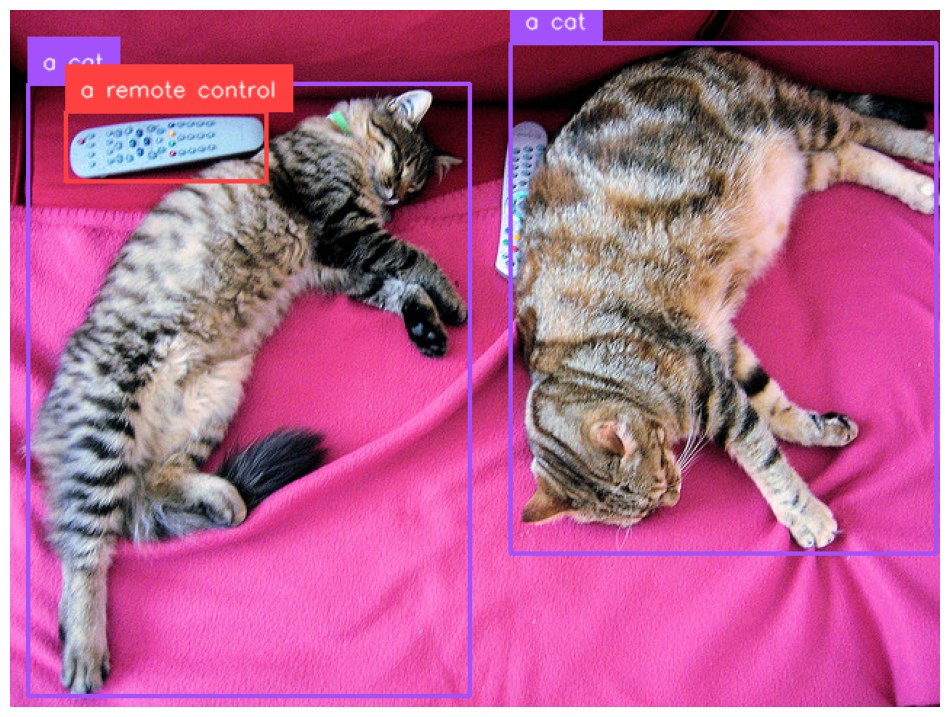

In [ ]:
sv.plot_image(annotated_frame)

In [ ]:
  n bb vb